### 🎨 **CDD-22: Visualização Avançada (Pie, Boxplot, Scatter)**

**Autora:** Tina Almeida

**Data:** 11/02/2026

**Dataset:** `fifa19.csv`, `house.csv`

---
### 🎯 Objetivo
Criar gráficos estatísticos avançados para análise de proporção (Pizza), distribuição e outliers (Boxplot) e correlação (Scatter Plot)

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Estilo dos gráficos (fundo cinza claro, grid, etc.)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)  # Tamanho padrão dos gráficos
plt.rcParams['font.size'] = 12  # Tamanho da fonte geral

print("--- 🎨 Configurações de visualização aplicadas ---")

--- 🎨 Configurações de visualização aplicadas ---


1️⃣ Carregando dados

In [23]:
print("\n🗂️ Iniciando carregamento de dados")

# Caminho para o arquivo CSV
caminho_fifa19 = "../dados/fifa19/fifa19.csv"
caminho_house = "../dados/house/house.csv"
encoding = 'latin1'  # Especificando a codificação

# Verificando se os arquivos existem
if os.path.exists(caminho_fifa19):
    df_fifa19 = pd.read_csv(caminho_fifa19, encoding=encoding)
    print(f"\n✅ FIFA 19 carregado com {len(df_fifa19)} registros")
    print(f"📊 Colunas quantidade de disponíveis: {len(df_fifa19.columns)}")
    print("Dados Carregados com sucesso! 🎉")
else:
    print(f"❌ Arquivo FIFA 19 não encontrado em {caminho_fifa19}")

if os.path.exists(caminho_house):
    df_house = pd.read_csv(caminho_house, encoding=encoding)
    print(f"\n✅ House dataset carregado com {len(df_house)} registros")
    print(f"📊 Colunas quantidade de disponíveis: {len(df_house.columns)}")
    print("Dados Carregados com sucesso! 🎉")
else:
    print(f"❌ Arquivo House dataset não encontrado em {caminho_house}")


🗂️ Iniciando carregamento de dados

✅ FIFA 19 carregado com 18207 registros
📊 Colunas quantidade de disponíveis: 89
Dados Carregados com sucesso! 🎉

✅ House dataset carregado com 63023 registros
📊 Colunas quantidade de disponíveis: 13
Dados Carregados com sucesso! 🎉


2️⃣ Gráfico de Pizza (Pé Preferido) 🍕

--- Gráfico de Pizza (Pé Preferido) 🍕---


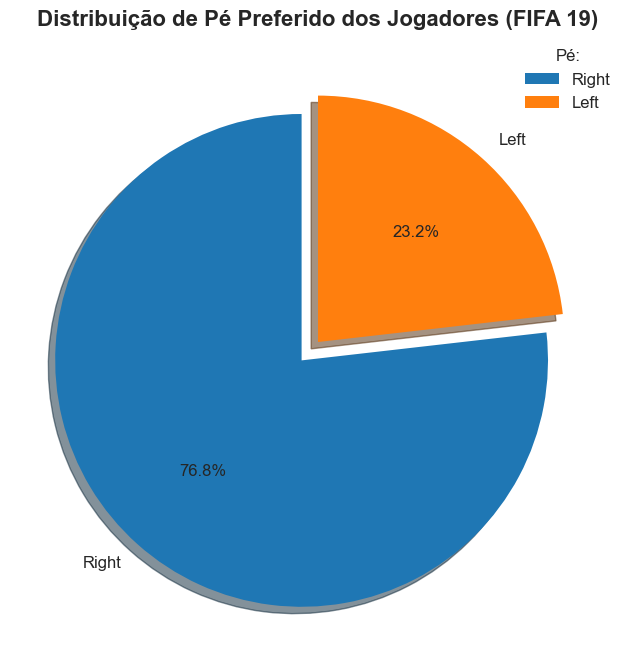

In [24]:
print("--- Gráfico de Pizza (Pé Preferido) 🍕---")

# Contando destros e canhotos
contagem = df_fifa19['Preferred Foot'].value_counts()
labels = contagem.index
valores = contagem.values

# Cores (azul para destros, laranja para canhotos)
cores = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 8))

# explode: Separa a fatia de menor destaque
plt.pie(valores, labels=labels, colors=cores, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0), shadow=True)

plt.title("Distribuição de Pé Preferido dos Jogadores (FIFA 19)", fontsize=16, fontweight='bold')
plt.legend(title="Pé:")

plt.savefig("../graficos/pizza_pe_preferido.png", dpi=300, bbox_inches='tight')
plt.show()

3️⃣ Boxplot (Comparando Gigantes) 📦

--- Boxplot (Distribuição de Habilidades) 📦 


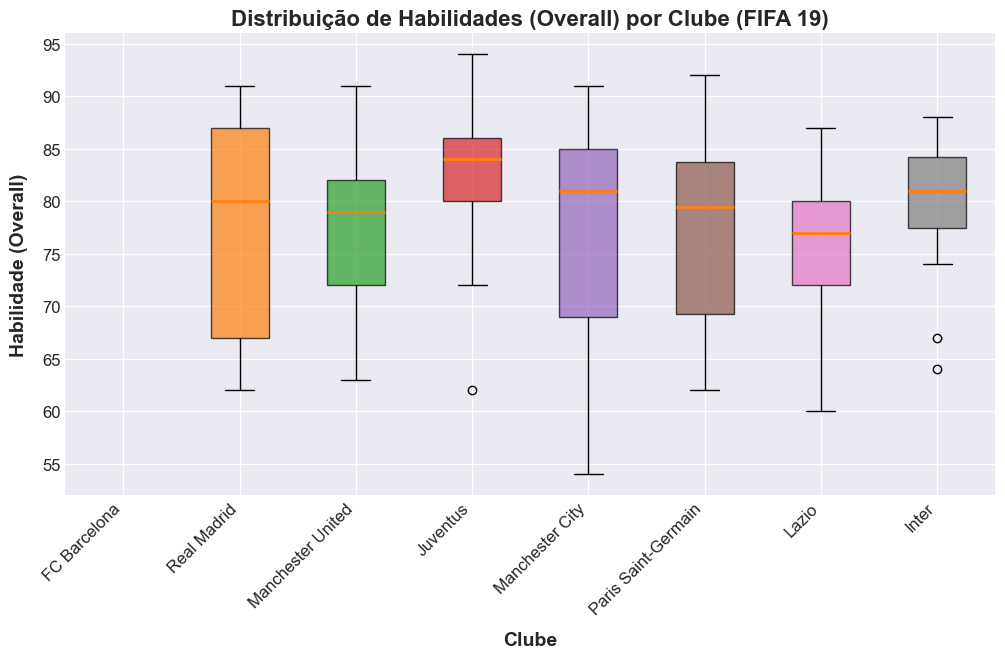

In [29]:
print("--- Boxplot (Distribuição de Habilidades) 📦 ")

# Selecionando as colunas dos clubes
clubes =  ['FC Barcelona', 'Real Madrid', 'Manchester United', 'Juventus', 'Manchester City', 'Paris Saint-Germain', 'Lazio', 'Inter']
dados_clubes = []

# Loop para pegar os dados de cada time
for clube in clubes:
    jogador_clube = df_fifa19.loc[df_fifa19['Club'] == clube, 'Overall']
    dados_clubes.append(jogador_clube)

plt.figure(figsize=(12, 6))

# patch_artist permite personalizar as caixas
caixas = plt.boxplot(dados_clubes, tick_labels=clubes, patch_artist=True, medianprops={'linewidth': 2 })

# Personalizando as caixas
cores_caixas = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
for caixa, cor in zip(caixas['boxes'], cores_caixas):
    caixa.set_facecolor(cor)
    caixa.set_alpha(0.7)

plt.title("Distribuição de Habilidades (Overall) por Clube (FIFA 19)", fontsize=16, fontweight='bold')
plt.xlabel("Clube", fontsize=14, labelpad=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Habilidade (Overall)", fontsize=14, labelpad=10, fontweight='bold')

plt.savefig("../graficos/boxplot_habilidades_clubes.png", dpi=300, bbox_inches='tight')
plt.show()


4️⃣ Scatter Plot (Preço vs Quartos) 📉

--- Scatter Plot (Correlação) 📉 ----


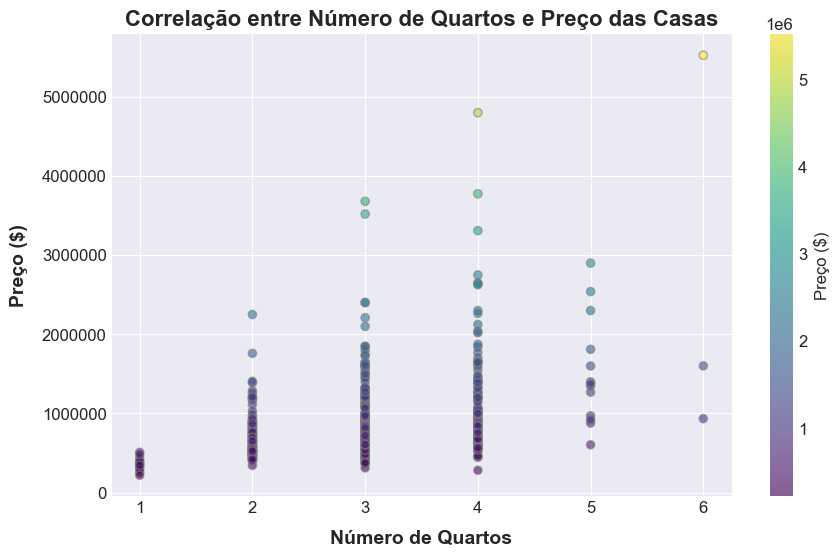

In [30]:
print("--- Scatter Plot (Correlação) 📉 ----")

# Vamos pegar um amostra de 500 casas para o gráfico não ficar muito carregado
amostra_500 = df_house.sample(n=500, random_state=42)

plt.figure(figsize=(10, 6))

# scatter(x, y)
# c=Price: A cor muda conforme o preço fica mais alto (mapa de calor)
# cmap='viridis' é um mapa de cores que vai do azul ao amarelo, passando por verde
plt.scatter(amostra_500['Rooms'], amostra_500['Price'], alpha=0.6, c=amostra_500['Price'], cmap='viridis', edgecolors='gray')

plt.colorbar(label='Preço ($)')  # Adiciona uma barra de cores para referência
plt.title("Correlação entre Número de Quartos e Preço das Casas", fontsize=16, fontweight='bold')
plt.xlabel("Número de Quartos", fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel("Preço ($)", fontsize=14, labelpad=10, fontweight='bold')

# Ajustando os limites do eixo y para melhor visualização
plt.ticklabel_format(style='plain', axis='y')  # Evita notação científica

plt.savefig("../graficos/scatter_rooms_price.png", dpi=300, bbox_inches='tight')
plt.show()